# PROGRAM 1




In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as shc
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [21]:
data=pd.read_csv("Country-data.csv",index_col=None)
data



,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [22]:

data.shape



(167, 10)

In [23]:
data1=data.drop(["country"],axis=1,index=None)
data1





,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [24]:

st = StandardScaler()
col = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
data1[col] = st.fit_transform(data1[col])
data1




,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


In [25]:
data1.columns
data1.set_axis(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp'],axis='columns',inplace=True)
print(data1.columns)
data1




Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


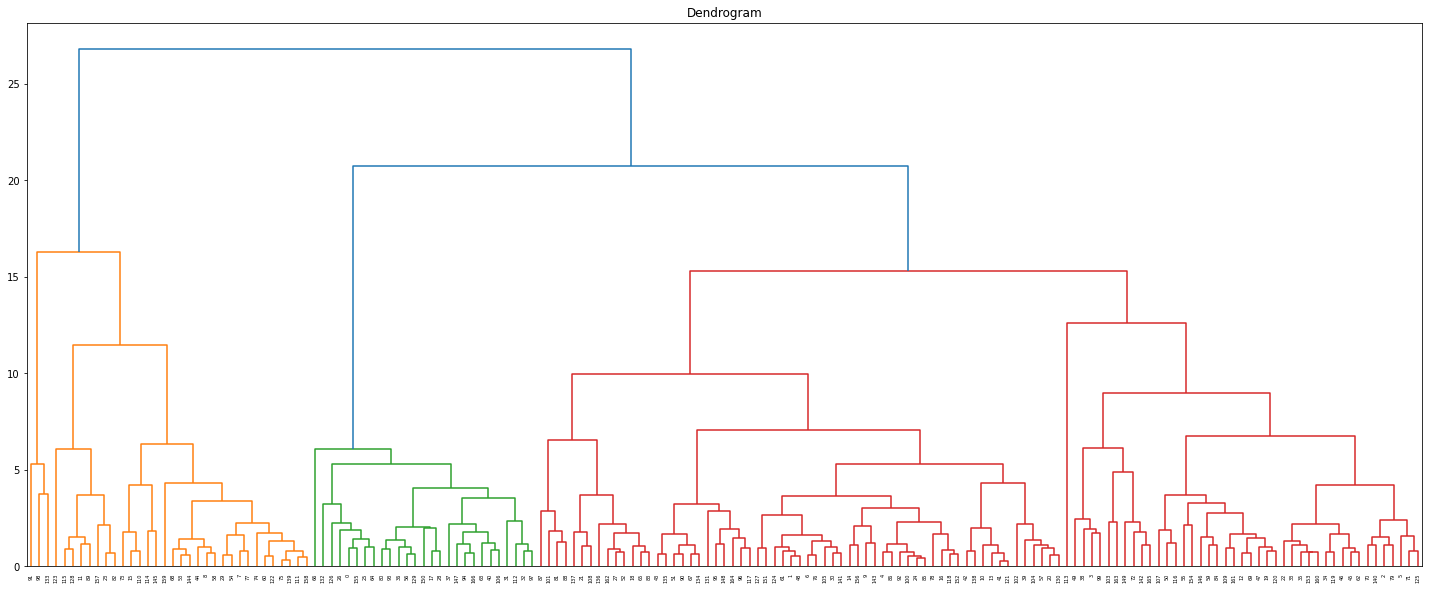

In [26]:
plt.figure(figsize=(25,10))
plt.title("Dendrogram")
dendo=shc.dendrogram(shc.linkage(data1,method="ward"))





In [27]:
z=shc.ward(data1)
z



array([[4.10000000e+01, 1.21000000e+02, 2.70510920e-01, 2.00000000e+00],
       [7.50000000e+01, 1.39000000e+02, 3.45939626e-01, 2.00000000e+00],
       [2.40000000e+01, 8.50000000e+01, 4.23131474e-01, 2.00000000e+00],
       [1.11000000e+02, 1.58000000e+02, 4.94330379e-01, 2.00000000e+00],
       [6.00000000e+01, 1.22000000e+02, 5.44105161e-01, 2.00000000e+00],
       [1.00000000e+02, 1.69000000e+02, 5.58805736e-01, 3.00000000e+00],
       [1.00000000e+00, 4.80000000e+01, 5.59540632e-01, 2.00000000e+00],
       [5.30000000e+01, 1.44000000e+02, 5.68799380e-01, 2.00000000e+00],
       [2.90000000e+01, 5.40000000e+01, 5.90319960e-01, 2.00000000e+00],
       [2.00000000e+01, 1.30000000e+02, 6.04562360e-01, 2.00000000e+00],
       [6.00000000e+00, 7.60000000e+01, 6.13397046e-01, 2.00000000e+00],
       [5.60000000e+01, 1.29000000e+02, 6.27531275e-01, 2.00000000e+00],
       [4.30000000e+01, 1.35000000e+02, 6.39912838e-01, 2.00000000e+00],
       [5.10000000e+01, 9.00000000e+01, 6.49519933e

In [28]:
data1["cluster_labels"]=shc.cut_tree(z,n_clusters=[3])
data1




,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180,0
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,1
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376,1
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268,1
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817,1
...,...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913,1
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323,1
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754,1
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754,1


In [29]:
pCA=PCA(n_components=4)
Principalcomponents=pCA.fit_transform(data1)
principalDF = pd.DataFrame(data = Principalcomponents
             , columns = ['pc1', 'pc2',"pc3","pc4"])
principalDF





,pc1,pc2,pc3,pc4
0,-3.083119,0.099700,-0.679093,1.028106
1,0.404462,-0.555534,-0.412147,-1.157873
2,-0.273313,-0.483219,1.171500,-0.920294
3,-2.851405,1.570133,1.707855,0.835322
4,0.984471,0.179860,-0.297069,-0.855223
...,...,...,...,...
162,-0.820285,0.634664,-0.366362,-0.671870
163,-0.494878,-1.326853,3.066054,-0.240219
164,0.456988,1.412565,-0.239677,-1.048228
165,-1.826078,-0.188016,1.174267,0.041781


In [30]:
final=pd.concat([data1,principalDF],axis=1)
final



,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels,pc1,pc2,pc3,pc4
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180,0,-3.083119,0.099700,-0.679093,1.028106
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,1,0.404462,-0.555534,-0.412147,-1.157873
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376,1,-0.273313,-0.483219,1.171500,-0.920294
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268,1,-2.851405,1.570133,1.707855,0.835322
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817,1,0.984471,0.179860,-0.297069,-0.855223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913,1,-0.820285,0.634664,-0.366362,-0.671870
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323,1,-0.494878,-1.326853,3.066054,-0.240219
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754,1,0.456988,1.412565,-0.239677,-1.048228
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754,1,-1.826078,-0.188016,1.174267,0.041781


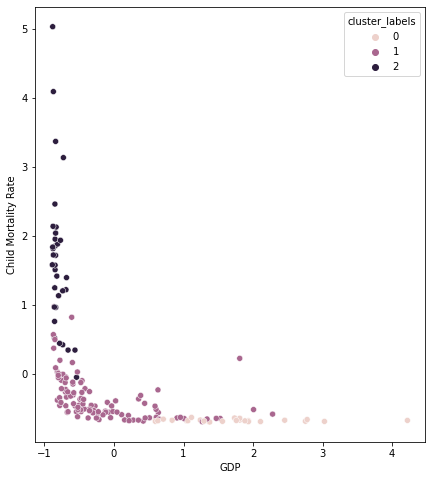

In [31]:
fig = plt.figure(figsize = (7,8))
sns.scatterplot(x='child_mort',y='gdpp',hue='cluster_labels',legend='full',data=final)
plt.xlabel('GDP')
plt.ylabel('Child Mortality Rate')
plt.show()
